# 3x2 Time evolution plots GC scale

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3d plots
from matplotlib.font_manager import FontProperties #for the pdf fonts

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator, MaxNLocator
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from scipy import optimize

import matplotlib.colors as mcolors

import numpy as np
import pandas as pd

from matplotlib import colors

import matplotlib.ticker as ticker

from scipy.stats import kde

from scipy import stats
from scipy import misc
çç




from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
#plt.rcParams['axes.labelweight'] = 'bold'
rcParams["axes.edgecolor"] = 'black'
rcParams["legend.edgecolor"] = '0.8'

plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
def fmt(x, pos):
    if x == 0:
        return r'0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [3]:
iwas4 = [-33.7673, 444.823, -18.1474] #Centered using other script

In [4]:
arr = 'old'
if arr =='new':
    arr0 = [[0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0]]
    arr0 = np.asarray(arr0)
else:
    arr0 = np.load(arr+'0.npy')
    
arr1 = np.load(arr+'1.npy')
arr2 = np.load(arr+'2.npy')
arr3 = np.load(arr+'3.npy')
arr4 = np.load(arr+'4.npy')
arr5 = np.load(arr+'5.npy')
arr6 = np.load(arr+'6.npy')

col_header = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'iwas', 'id', 'mass']
arr0 = pd.DataFrame(arr0, columns=col_header)
arr1 = pd.DataFrame(arr1, columns=col_header)
arr2 = pd.DataFrame(arr2, columns=col_header)
arr3 = pd.DataFrame(arr3, columns=col_header)
arr4 = pd.DataFrame(arr4, columns=col_header)
arr5 = pd.DataFrame(arr5, columns=col_header)
arr6 = pd.DataFrame(arr6, columns=col_header)

In [5]:
arr0 = arr0.assign(x_scale = arr0.x - iwas4[0])
arr0 = arr0.assign(y_scale = arr0.y - iwas4[1])

arr1 = arr1.assign(x_scale = arr1.x - iwas4[0])
arr1 = arr1.assign(y_scale = arr1.y - iwas4[1])

arr2 = arr2.assign(x_scale = arr2.x - iwas4[0])
arr2 = arr2.assign(y_scale = arr2.y - iwas4[1])

arr3 = arr3.assign(x_scale = arr3.x - iwas4[0])
arr3 = arr3.assign(y_scale = arr3.y - iwas4[1])

arr4 = arr4.assign(x_scale = arr4.x - iwas4[0])
arr4 = arr4.assign(y_scale = arr4.y - iwas4[1])

arr5 = arr5.assign(x_scale = arr5.x - iwas4[0])
arr5 = arr5.assign(y_scale = arr5.y - iwas4[1])

arr6 = arr6.assign(x_scale = arr6.x - iwas4[0])
arr6 = arr6.assign(y_scale = arr6.y - iwas4[1])

In [6]:
rang = 50

# Calculate histogram bins then use imshow()
# Weighted by mass
#gal_count, xedges, yedges = np.histogram2d(new['y_scale'], new['z_scale'], bins=[bins, bins],range=([-rang,rang],[-rang,rang]), weights=new['mass'])
arr0_hist, xedges, yedges = np.histogram2d(arr0.x_scale, arr0.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr0.mass)
arr1_hist, xedges, yedges = np.histogram2d(arr1.x_scale, arr1.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr1.mass)
arr2_hist, xedges, yedges = np.histogram2d(arr2.x_scale, arr2.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr2.mass)
arr3_hist, xedges, yedges = np.histogram2d(arr3.x_scale, arr3.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr3.mass)
arr4_hist, xedges, yedges = np.histogram2d(arr4.x_scale, arr4.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr4.mass)
arr5_hist, xedges, yedges = np.histogram2d(arr5.x_scale, arr5.y_scale, bins=rang*2 ,range=([-rang,rang],[-rang,rang]), weights=arr5.mass)



smoothing_sigma = 15
gamma = 0.5

arr0_hist = gaussian_filter(arr0_hist, sigma=smoothing_sigma)
arr1_hist = gaussian_filter(arr1_hist, sigma=smoothing_sigma)
arr2_hist = gaussian_filter(arr2_hist, sigma=smoothing_sigma)
arr3_hist = gaussian_filter(arr3_hist, sigma=smoothing_sigma)
arr4_hist = gaussian_filter(arr4_hist, sigma=smoothing_sigma)
arr5_hist = gaussian_filter(arr5_hist, sigma=smoothing_sigma)

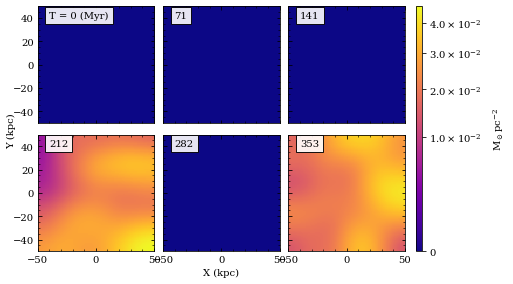

In [14]:
time_x = -40
time_y = 40

#cmap = plt.cm.get_cmap('magma_r')
cmap = plt.cm.get_cmap('plasma')


fig = plt.figure()
gs = gridspec.GridSpec(2, 5, width_ratios=[1,1,1, 0.05, 0.05])  
cbax = plt.subplot(gs[:,4])


ax0 = plt.subplot(gs[0,0]) # top left
ax1 = plt.subplot(gs[0,1]) # top middle
ax2 = plt.subplot(gs[0,2]) # top right
ax3 = plt.subplot(gs[1,0]) # bottom left
ax4 = plt.subplot(gs[1,1]) # bottom middle
ax5 = plt.subplot(gs[1,2]) # bottom right
#fig.set_size_inches(6, 6.05)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)


plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)



arr0_max = np.max(arr0_hist)
arr1_max = np.max(arr1_hist)
arr2_max = np.max(arr2_hist)
arr3_max = np.max(arr3_hist)
arr4_max = np.max(arr3_hist)
arr5_max = np.max(arr3_hist)

all_max = np.max([arr0_max, arr1_max, arr2_max, arr3_max, arr4_max, arr5_max])

props = dict(facecolor='white',alpha=0.9)  
vmin = 0
#vmin = 1e3



im = ax0.imshow(arr0_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())
ax0.text(time_x, time_y, 'T = 0 (Myr)', bbox=props)


ax1.imshow(arr1_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.text(time_x, time_y, '71', bbox=props)

ax2.imshow(arr2_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.text(time_x, time_y, '141', bbox=props)


ax3.imshow(arr3_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.text(time_x, time_y, '212', bbox=props)

ax4.imshow(arr4_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.text(time_x, time_y, '282', bbox=props)

ax5.imshow(arr5_hist.T, cmap=cmap, origin='lower', vmin=vmin, vmax=all_max, norm=mcolors.PowerNorm(gamma), extent=[-rang, rang, -rang, rang])
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.text(time_x, time_y, '353', bbox=props)

ax0.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax1.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax2.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax3.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax4.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
ax5.tick_params(direction='in', axis='both', which='both', bottom=True,top=True, left=True, right=True)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.0, hspace=0.1)    


ax4.set_xlabel("X (kpc)")
#ax3.set_ylabel("y (pc)")
fig.text(-0.01, 0.5, 'Y (kpc)', va='center', rotation='vertical')

cb = Colorbar(ax = cbax, mappable = im , format=ticker.FuncFormatter(fmt))
#cb = Colorbar(ax = cbax, mappable = im)
cb.set_label(r'M$_\odot$pc$^{-2}$', labelpad=10)
plt.savefig("time_ev_scale"+arr, bbox_inches='tight', dpi = 300)

plt.show()